## Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
%run ..//..//Library//SVRLSPercent_Library.ipynb 

## Score Functions

In [9]:
def mape_score(y_real, y_predict):
    return np.mean(np.abs((y_real - y_predict)/y_real))*100

In [10]:
def rmspe_score(y_real, y_predict):
    return np.sqrt(np.mean(np.square(( y_real - y_predict)/y_real)))*100

## Load data

In [11]:
diabetes = load_diabetes()

# Initializing the dataframe
data = pd.DataFrame(diabetes.data)

#Adding the feature names to the dataframe
data.columns = diabetes.feature_names
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [12]:
#Adding target variable to dataframe
data['diabetes'] = diabetes.target 

In [13]:
# Spliting target variable and independent variables
X = data.drop(['diabetes'], axis = 1)
y = data['diabetes']

In [14]:
# Matrix obtained with symbolic transformation
# X = pd.read_csv("newBoston.csv")

In [15]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
y_train = y_train.to_numpy(); y_test = y_test.to_numpy()

In [16]:
# Standarize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## fit

In [23]:
model = SVR_PerLs(C = 1103860.1485, gamma = 0.0025, kernel = "rbf").fit(X_train, y_train)

## Predict

In [24]:
predict = model.predict(X_train)
forecast = model.predict(X_test)

In [25]:
print(f"MAPE: {mape_score(y_test, forecast)}")
print(f"RMSPE: {rmspe_score(y_test, forecast)}")
print(f"R2: {metrics.r2_score(y_test, forecast)}")
print(f"MSE: {metrics.mean_squared_error(y_test, forecast)}")

MAPE: 34.19295983969219
RMSPE: 41.67785273179162
R2: 0.11304000839374828
MSE: 4747.776745228258


In [26]:
mapscortrain = mape_score(y_train, predict)
mapscortest = mape_score(y_test, forecast)
rmspetrain = rmspe_score(y_train, predict)
rmspetest = rmspe_score(y_test, forecast)
print(f"MAPE train score: {mapscortrain:.3},\nMAPE test score: {mapscortest:.3}")
print(f"RMSPE train score: {rmspetrain:.6},\nRMSPE test score: {rmspetest:.6}")

MAPE train score: 31.7,
MAPE test score: 34.2
RMSPE train score: 38.3413,
RMSPE test score: 41.6779


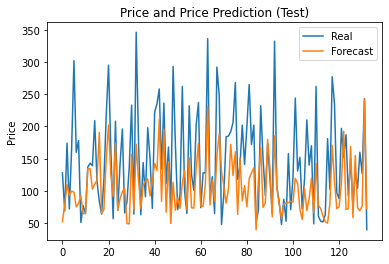

In [27]:
plt.title("Price and Price Prediction (Test)")
plt.plot(y_test, label = "Real")
plt.plot(forecast, label = "Forecast")
plt.ylabel("Price")
plt.legend();

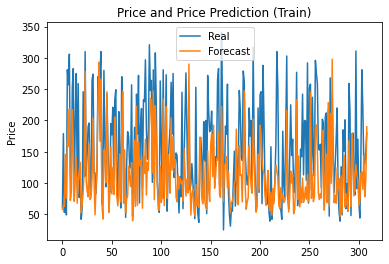

In [28]:
plt.title("Price and Price Prediction (Train)")
plt.plot(y_train, label = "Real")
plt.plot(predict, label = "Forecast")
plt.ylabel("Price")
plt.legend();